In [5]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load model and tokenizer
model_name = "gpt2"  # Options: "gpt2", "gpt2-medium", "gpt2-large", "gpt2-xl"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Set pad token (GPT-2 doesn't have one by default)
tokenizer.pad_token = tokenizer.eos_token

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.eval()

def generate_text(prompt, max_length=100, temperature=0.8, top_p=0.9, num_return_sequences=1):
    """
    Generate text from a prompt using GPT-2
    
    Args:
        prompt: Starting text
        max_length: Maximum length of generated text
        temperature: Controls randomness (0.1=conservative, 1.0=creative)
        top_p: Nucleus sampling threshold
        num_return_sequences: Number of different sequences to generate
    """
    # Encode the prompt
    inputs = tokenizer.encode(prompt, return_tensors="pt").to(device)
    
    # Generate
    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=max_length,
            temperature=temperature,
            top_p=top_p,
            num_return_sequences=num_return_sequences,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id,
            attention_mask=torch.ones_like(inputs)
        )
    
    # Decode and return the generated text
    generated_texts = []
    for output in outputs:
        text = tokenizer.decode(output, skip_special_tokens=True)
        generated_texts.append(text)
    
    return generated_texts

# Example usage
prompt = "The future of artificial intelligence is"
generated = generate_text(prompt, max_length=150, temperature=0.8)

for i, text in enumerate(generated):
    print(f"Generation {i+1}:")
    print(text)
    print("-" * 50)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Generation 1:
The future of artificial intelligence is already in the rearview mirror, but as the world continues to develop and evolve, it's important to understand the different ways in which it's evolving. For instance, a few years ago, Microsoft unveiled an augmented reality system that could be used to augment human speech and images.

It's not a new idea. The idea was originally developed by the company's HoloLens, which was released in 2010. The company said in a blog post that it's now "now fully integrated into Windows 10 and HoloLens," and that it will be available for "all Microsoft devices and PCs in the coming months."

Microsoft's HoloLens is a different kind of augmented reality device. The device uses a computer's
--------------------------------------------------


In [6]:
from datasets import load_dataset
human_stories = load_dataset("FareedKhan/1k_stories_100_genre")


In [7]:
import pandas as pd

human_stories_db = load_dataset("FareedKhan/1k_stories_100_genre")
human_stories_df = pd.DataFrame(human_stories_db["train"])



In [8]:
human_stories_df["shortened"] = human_stories_df["story"].str.split("\n").str[0]


In [9]:
title_letters = human_stories_df["title"].str[0]
title_letters

0      T
1      E
2      E
3      E
4      T
      ..
995    T
996    T
997    T
998    T
999    T
Name: title, Length: 1000, dtype: object

In [10]:
sample = title_letters.reset_index().merge(human_stories_df["shortened"].reset_index()).drop(columns=["index"])


In [11]:
sample

,title,shortened
0,T,"In the year 2250, Earth had made significant s..."
1,E,"In a land far away, where the sun shone bright..."
2,E,"Once upon a time, in a small, tranquil town ca..."
3,E,"Once upon a time in the 16th century, a small ..."
4,T,In the sun-drenched coastal city of St. August...
...,...,...
995,T,"In the distant year of 3025, the spacecraft Se..."
996,T,"In the steam-powered city of Icarus, the clock..."
997,T,"Jack, a small-time crook, hatched a plan to st..."
998,T,"In a small village, a curious phenomenon occur..."


In [12]:
import pandas as pd

df = pd.read_csv("data/ai_eval_stories.csv")

In [13]:
def data_stream():
    """
    Simulates a data stream - you don't know what's coming next.
    In a real interview, this would be given to you.
    """
    import random
    random.seed(42)  # For reproducibility in testing
    
    # Simulate infinite stream
    while True:
        yield random.randint(1, 10)


# Or if they give you a finite stream:
def finite_data_stream(data):
    """
    Iterator over pre-existing data.
    In interview: stream = finite_data_stream([1, 2, 3, 1, 2, ...])
    """
    for item in data:
        yield item



stream = data_stream()


In [14]:

output = [next(stream) for _ in range(100)]


<Axes: ylabel='Frequency'>

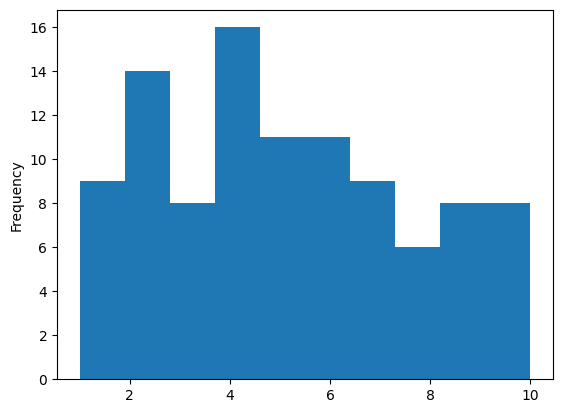

In [15]:
import pandas as pd
import seaborn as sns

pd.Series(output).plot.hist()

In [16]:
pd.Series(output).skew()

np.float64(0.2597376381493133)

In [17]:


"""
Near duplication?

Look at what percentage of charecters overlapping
Look at freq of chars 
overlapping words


Do we care about postition?
How any setneces do they have overlapping?
What percenrages of senteces are in both?

LLM filterting
This sound silly but is easy and very effcetive

"""

'\nNear duplication?\n\nLook at what percentage of charecters overlapping\nLook at freq of chars \noverlapping words\n\n\nDo we care about postition?\nHow any setneces do they have overlapping?\nWhat percenrages of senteces are in both?\n\nLLM filterting\nThis sound silly but is easy and very effcetive\n\n'

In [18]:
docs = [
"The cat in the hat is cool",
"The cat in the hat is cool",
"The cat in the hat is super cool"

]

set(docs)

{'The cat in the hat is cool', 'The cat in the hat is super cool'}

In [19]:
from collections import Counter
from copy import copy

sentence = "The cat in the hat is happy cool".split(" ")
orginal_sentence = copy(sentence)
for word in "The cat in the hat is super cool".split(" "):
    if word in sentence:
        sentence.remove(word)

len(sentence) / len(orginal_sentence)

0.125

In [20]:
text= "Hello how are you today"
sent  = text.split(" ")

doc_splits = {}

num_words_ahead = 3




In [21]:

def exact_deduplication(text):
    
    sentences = text.split("\n")
    seen = set()
    output= []
    for sent in sentences:
        if sent not in seen or sent == "":
            seen.add(sent)
            output.append(sent)
        
    return "\n".join(output)

    
    

text = """
Near duplication?

Look at what percentage of charecters overlapping
Look at freq of chars 
overlapping words


Do we care about postition?
How any setneces do they have overlapping?
What percenrages of senteces are in both?

LLM filterting
This sound silly but is easy and very effcetive

Near duplication?
"""


text2 = """
Near duplication?

Look at what percentage of charecters overlapping
overlapping words

This is pretty cool
Do we care about postition?
How any setneces do they have overlapping?
What percenrages of senteces are in both?

LLM filterting
This sound silly but is easy and very effcetive

Near duplication?
"""

text3 = """

Hello this is a pretty cool place

anxiety is not about getting rid of it but just sitting with it dealing with it you know
"""

In [22]:
def get_n_gram(text, n=6):
    words = text.replace("\n"," ").split(" ")
    sent_splits = [words[i:] for i in range(n)]
    return list(zip(*sent_splits))
    

n_gram1 = set(get_n_gram(text))
n_gram2 = set(get_n_gram(text2))

len(n_gram1.intersection(n_gram2))/ len(n_gram1.union(n_gram2))



0.5714285714285714

In [23]:
"""

We have to check each doc with all other docsThat seems quite bad 
How to get around that? 
Well we can use a hash or bucketting approach
We could hash based off a certain number of the sentences

"""

'\n\nWe have to check each doc with all other docsThat seems quite bad \nHow to get around that? \nWell we can use a hash or bucketting approach\nWe could hash based off a certain number of the sentences\n\n'

_IncompleteInputError: incomplete input (1047536331.py, line 4)

In [ ]:
text = """
Given a string and a list of stopwords, return the substring that appears before the first occurrence of any stopword.

Follow-up:
What if the input is a stream and cannot be fully loaded into memory?
"""

stop_words = ["the", "stopwords"]

first_stop_word = min([text.find(stop_word) for stop_word in stop_words])
first_stop_word

30

In [26]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


# Books table
books = pd.DataFrame({
    'book_id': range(1, 101),
    'title': [f'Book_{i}' for i in range(1, 101)],
    'author_id': np.random.randint(1, 51, 100),
    'publication_date': pd.date_range('2020-01-01', periods=100),
    'category': np.random.choice(['Fiction', 'Non-Fiction', 'Science', 'History'], 100),
    'price': np.random.uniform(10, 50, 100)
})

# Authors table
authors = pd.DataFrame({
    'author_id': range(1, 301),
    'first_name': [f'FirstName_{i}' for i in range(1, 301)],
    'last_name': [f'LastName_{i}' for i in range(1, 301)],
    'birthday': pd.date_range('1950-01-01', periods=300),
    'website_url': [f'http://author{i}.com' if i % 10 < 3 else f'https://author{i}.com' 
                    for i in range(1, 301)]
})

# Customers table
customers = pd.DataFrame({
    'customer_id': range(1, 501),
    'first_name': [f'Customer_{i}' for i in range(1, 501)],
    'last_name': [f'LastName_{i}' for i in range(1, 501)],
    'registration_date': pd.date_range('2021-01-01', periods=500),
    'interested_in_categories': np.random.choice(['Fiction', 'Non-Fiction', 'Science'], 500),
    'is_rewards_member': np.random.choice([True, False], 500),
    'invited_by_customer_id': [np.random.randint(1, 100) if i % 3 == 0 else None 
                                for i in range(500)]
})

# Transactions table
transactions = pd.DataFrame({
    'transaction_id': range(1, 1001),
    'book_id': np.random.randint(1, 101, 1000),
    'customer_id': np.random.randint(1, 501, 1000),
    'payment_amount': np.random.uniform(10, 200, 1000),
    'book_count': np.random.randint(1, 5, 1000),
    'tax_rate': 0.08,
    'discount_rate': np.random.uniform(0, 0.2, 1000),
    'transaction_date': pd.date_range('2023-01-01', periods=1000, freq='H'),
    'payment_type': np.random.choice(['card', 'cash', 'cheque'], 1000)
})



# ============================================================================
# QUESTION 1
# ============================================================================
"""
What was the total number of sold books and the unique number
of sold books, grouped and sorted in descending order by payment_type?

Expected columns:
- payment_type
- total_sold_books (sum of book_count)
- unique_sold_books (count of distinct book_id)
"""
len(transactions["book_id"].unique())
len(transactions)

print(transactions.groupby("payment_type")["book_id"].count().sort_index())

print(transactions.groupby("payment_type")["book_id"].apply(lambda x: len(set(x))).sort_index())





payment_type
card      331
cash      363
cheque    306
Name: book_id, dtype: int64
payment_type
card      96
cash      98
cheque    92
Name: book_id, dtype: int64


/var/folders/pq/mh099fxx0gnb6hzjn5shpb180000gn/T/ipykernel_40625/645979522.py:47: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'transaction_date': pd.date_range('2023-01-01', periods=1000, freq='H'),


In [37]:
from collections import defaultdict
"""
Find the top 3 customers ordered by the total sales value
of the people they directly invited.

Expected columns:
- customer_id_who_invited_people (invited_by_customer_id)
- sales_value_of_invited_people (sum of payment_amount)
"""
def question_2(transactions, customers):
    pass

"""
Need to find which customers invited who. Then sum the total amout for each
Let's first do how much each spent 
"""



customers_spent = customers.merge(transactions.groupby("customer_id")["payment_amount"].sum().rename("total_spent").reset_index())

# customer_invite_spending = defaultdict(int)
# def get_refered_spending(x):
#     referred_by, spent = x
    
#     if referred_by != np.nan:
#         customer_invite_spending[referred_by] += spent
    

# customers_spent[["invited_by_customer_id", "total_spent"]].dropna().apply(get_refered_spending,axis=1)
# customer_invite_spending

referal_table = customers_spent.dropna().groupby("invited_by_customer_id")["total_spent"].sum().reset_index().rename(columns={"invited_by_customer_id":"customer_id", "total_spent":"referal_spending"})

referal_bonus =  customers_spent.merge(referal_table)

customers_spent_refferal = customers_spent.merge(referal_bonus)
customers_spent_refferal.sort_values(by=["referal_spending"], ascending=False)[:5]

# customers_spent["referal_spending"].sort_values()

,customer_id,first_name,last_name,registration_date,interested_in_categories,is_rewards_member,invited_by_customer_id,total_spent,referal_spending
59,88,Customer_88,LastName_88,2021-03-29,Science,False,53.0,276.094475,1384.083659
11,17,Customer_17,LastName_17,2021-01-17,Science,False,NaN,146.327051,1247.370854
20,32,Customer_32,LastName_32,2021-02-01,Science,False,NaN,631.699364,1120.225746
56,84,Customer_84,LastName_84,2021-03-25,Science,False,NaN,82.353675,1109.819418
19,31,Customer_31,LastName_31,2021-01-31,Fiction,True,66.0,241.205672,1080.466712


In [ ]:
# ============================================================================
# QUESTION 3
# ============================================================================
"""
Find the number of authors who have website URLs prefixed with "http://"
and that never made a sale. Compare this with the total number of authors.

Expected columns:
- authors_with_http_and_no_sales
- authors_in_total
"""
def question_3(authors, books, transactions):
    pass
authors
books

books_num_sold = books.merge(transactions.groupby(["book_id"])["transaction_id"].count().rename("num_orders").reset_index())
authour_books_sold = books_num_sold.groupby("author_id")["author_id"].count().rename("total_book_sold").reset_index()
authors_total_books_sold = authors.merge(authour_books_sold)
len(authors_total_books_sold[authors_total_books_sold.website_url.str.startswith("http://") & authors_total_books_sold.total_book_sold == 0])/ len(authors_total_books_sold)


authors_total_books_sold[(authors_total_books_sold.website_url.str.startswith("http://")) & (authors_total_books_sold.total_book_sold == 0)]


,author_id,first_name,last_name,birthday,website_url,total_book_sold


In [251]:
"""
Find customers who purchased from the same author with at least 
two different categories and the total sales of these books.

Expected columns:
- customer_id
- author_id
- num_categories
- total_sales
"""
def question_4(transactions, books):
    pass

authour_books = authors.merge(books)
total_df = transactions.merge(authour_books)

merged = transactions.merge(books[['book_id', 'author_id', 'category']], on='book_id')
    
    # Group and aggregate in one step
result = merged.groupby(['customer_id', 'author_id']).agg(
    num_categories=('category', 'nunique'),
    total_sales=('payment_amount', 'sum')
).reset_index()

result
# filtred_df.reset_index()


,customer_id,author_id,num_categories,total_sales
0,2,17,2,52.033071
1,2,39,1,13.446809
2,3,26,1,127.721409
3,3,45,1,137.466659
4,4,46,1,87.725316
...,...,...,...,...
961,497,50,1,51.008047
962,498,32,1,46.506607
963,498,40,1,152.903237
964,499,16,1,195.592477


In [250]:
result = merged.groupby(['customer_id', 'author_id']).agg(
    num_categories=('category', 'nunique'),
    total_sales=('payment_amount', 'sum')
)


In [213]:
transactions

,transaction_id,book_id,customer_id,payment_amount,book_count,tax_rate,discount_rate,transaction_date,payment_type,month
0,1,90,419,60.113415,3,0.08,0.101922,2023-01-01 00:00:00,cash,1
1,2,48,478,68.116749,4,0.08,0.155978,2023-01-01 01:00:00,card,1
2,3,39,190,157.212352,2,0.08,0.114550,2023-01-01 02:00:00,cash,1
3,4,50,179,176.229066,1,0.08,0.047502,2023-01-01 03:00:00,cash,1
4,5,75,204,28.534184,2,0.08,0.016858,2023-01-01 04:00:00,cheque,1
...,...,...,...,...,...,...,...,...,...,...
995,996,37,254,118.527739,1,0.08,0.006332,2023-02-11 11:00:00,cheque,2
996,997,19,126,186.446123,1,0.08,0.178018,2023-02-11 12:00:00,cheque,2
997,998,63,426,183.399490,1,0.08,0.073683,2023-02-11 13:00:00,cheque,2
998,999,6,7,21.555850,4,0.08,0.003495,2023-02-11 14:00:00,card,2


In [252]:
category_counts = merged.groupby(['customer_id', 'author_id'])['category'].nunique()
valid_pairs = category_counts[category_counts >= 2].reset_index()
valid_pairs.columns = ['customer_id', 'author_id', 'num_categories']

sales_totals = merged.groupby(['customer_id', 'author_id'])['payment_amount'].sum().reset_index()
sales_totals.merge(valid_pairs)


,customer_id,author_id,payment_amount,num_categories
0,2,17,52.033071,2
1,25,15,176.106122,2
2,50,17,116.316652,2
3,79,35,255.696787,2
4,91,8,205.119161,2
5,114,40,194.645237,2
6,198,40,145.978584,2
7,310,32,328.540738,2
8,353,12,220.233913,2
9,408,38,152.171569,2


In [86]:
authors

,author_id,first_name,last_name,birthday,website_url
0,1,FirstName_1,LastName_1,1950-01-01,http://author1.com
1,2,FirstName_2,LastName_2,1950-01-02,http://author2.com
2,3,FirstName_3,LastName_3,1950-01-03,https://author3.com
3,4,FirstName_4,LastName_4,1950-01-04,https://author4.com
4,5,FirstName_5,LastName_5,1950-01-05,https://author5.com
...,...,...,...,...,...
295,296,FirstName_296,LastName_296,1950-10-23,https://author296.com
296,297,FirstName_297,LastName_297,1950-10-24,https://author297.com
297,298,FirstName_298,LastName_298,1950-10-25,https://author298.com
298,299,FirstName_299,LastName_299,1950-10-26,https://author299.com


In [171]:
"""
For each customer, find the total number of books and 
total number of unique books they purchased.

Expected columns:
- customer_id
- total_books (sum of book_count)
- unique_books (count of distinct book_id)
"""
def question_5(transactions):
    pass

merged.groupby(["customer_id"]).agg(
    total_books = ("book_id", "count"),
    unique_books = ("book_id", "nunique")
).reset_index()



,customer_id,total_books,unique_books
0,2,3,3
1,3,2,2
2,4,1,1
3,5,3,3
4,6,1,1
...,...,...,...
428,495,3,3
429,496,2,2
430,497,3,3
431,498,2,2


In [183]:
transactions

,transaction_id,book_id,customer_id,payment_amount,book_count,tax_rate,discount_rate,transaction_date,payment_type,month
0,1,90,419,60.113415,3,0.08,0.101922,2023-01-01 00:00:00,cash,1
1,2,48,478,68.116749,4,0.08,0.155978,2023-01-01 01:00:00,card,1
2,3,39,190,157.212352,2,0.08,0.114550,2023-01-01 02:00:00,cash,1
3,4,50,179,176.229066,1,0.08,0.047502,2023-01-01 03:00:00,cash,1
4,5,75,204,28.534184,2,0.08,0.016858,2023-01-01 04:00:00,cheque,1
...,...,...,...,...,...,...,...,...,...,...
995,996,37,254,118.527739,1,0.08,0.006332,2023-02-11 11:00:00,cheque,2
996,997,19,126,186.446123,1,0.08,0.178018,2023-02-11 12:00:00,cheque,2
997,998,63,426,183.399490,1,0.08,0.073683,2023-02-11 13:00:00,cheque,2
998,999,6,7,21.555850,4,0.08,0.003495,2023-02-11 14:00:00,card,2


In [ ]:
"""
Find top two months with unique customers who made purchases 
this month and the previous month.

Expected columns:
- year_month
- customers_bought_this_and_prev_month
"""
def question_6(transactions):
    pass

transactions["month"] = pd.to_datetime(transactions["transaction_date"]).dt.month
def test(x):
    month = x.iloc[0]["month"]
    unique_customer  = set(x["customer_id"].unique())
    
    prev_month_customers = set(transactions[(transactions.month == (month-1))]["customer_id"].unique())
    
    return len(unique_customer.intersection(prev_month_customers))

transactions.groupby("month").apply(test) 

/var/folders/pq/mh099fxx0gnb6hzjn5shpb180000gn/T/ipykernel_40625/2496087187.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transactions.groupby("month").apply(test)


month
1      0
2    163
dtype: int64

In [ ]:

# ============================================================================
# QUESTION 7
# ============================================================================
"""
Count the highest number of unique customers who have bought books 
in consecutive 2 months.

Expected output:
- max_customers_in_consecutive_2_months (single number)
"""
def question_7(transactions):
    pass



In [267]:
import pandas as pd
import numpy as np

# Create the listing_interaction table
listing_interaction = pd.DataFrame({
    'buyer_id': [413, 282, 206, 413, 413, 282, 500, 500, 600, 700, 413, 282, 800, 900, 900, 364, 364, 364, 312, 312],
    'seller_id': [364, 312, 900, 364, 364, 312, 364, 364, 900, 900, 555, 555, 555, 312, 312, 777, 777, 777, 888, 888],
    'date': ['2021-02-01', '2021-01-06', '2021-07-01', '2021-02-15', '2021-03-01', 
             '2021-01-20', '2021-04-10', '2021-05-12', '2021-06-15', '2021-07-20',
             '2021-08-01', '2021-08-15', '2021-09-01', '2021-09-10', '2021-09-25',
             '2021-10-01', '2021-10-15', '2021-11-01', '2021-11-10', '2021-12-01'],
    'product_id': [2435, 3452, 4644, 2435, 5001, 3452, 2435, 6001, 4644, 4644, 
                   7001, 7002, 7003, 3452, 8001, 9001, 9002, 9003, 10001, 10002],
    'li': [1, 6, 2, 3, 1, 2, 4, 1, 1, 3, 2, 5, 1, 4, 2, 7, 3, 2, 1, 4]
})
# ============================================================================
# QUESTION
# ============================================================================
"""
How many sellers have more than three products with multiple interactions? 
(e.g. li > 1)

Expected output:
- count (single number)
"""

def question(listing_interaction):
    pass

# Test your solution
result = question(listing_interaction)

sum(listing_interaction[listing_interaction.li > 1].groupby("seller_id")["product_id"].nunique() >= 3)






1

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Create the dim_all_product table
dim_all_product = pd.DataFrame({
    'product_id': [808, 343, 321, 150, 220, 445, 550, 670, 720, 890, 
                   100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'category': ['Vehicle', 'Home', 'Housing', 'Vehicle', 'Home', 'Vehicle', 
                 'Housing', 'Vehicle', 'Home', 'Vehicle',
                 'Vehicle', 'Home', 'Housing', 'Vehicle', 'Home', 
                 'Vehicle', 'Housing', 'Vehicle', 'Home', 'Vehicle'],
    'date': ['2021-09-01', '2021-02-01', '2021-04-01', '2021-08-15', '2021-03-10',
             '2021-07-20', '2021-05-05', '2021-08-25', '2021-06-12', '2021-09-05',
             '2021-01-15', '2021-02-20', '2021-03-25', '2021-04-30', '2021-05-18',
             '2021-06-22', '2021-07-28', '2021-08-30', '2021-09-02', '2021-09-06'],
    'create_date': ['2019-09-11', '2018-09-15', '2017-09-21', '2019-08-10', '2018-03-05',
                    '2019-07-15', '2017-05-01', '2021-09-01', '2018-06-10', '2021-09-03',
                    '2019-01-10', '2018-02-15', '2017-03-20', '2019-04-25', '2018-05-12',
                    '2021-09-04', '2017-07-22', '2021-09-05', '2021-09-02', '2021-09-06'],
    'country': ['CA', 'US', 'US', 'CA', 'US', 'CA', 'US', 'US', 'CA', 'US',
                'CA', 'US', 'CA', 'US', 'CA', 'US', 'CA', 'US', 'US', 'US']
})

# Use the listing_interaction table from before
listing_interaction = pd.DataFrame({
    'buyer_id': [413, 282, 206, 413, 413, 282, 500, 500, 600, 700, 413, 282, 800, 900, 900, 364, 364, 364, 312, 312],
    'seller_id': [364, 312, 900, 364, 364, 312, 364, 364, 900, 900, 555, 555, 555, 312, 312, 777, 777, 777, 888, 888],
    'date': ['2021-02-01', '2021-01-06', '2021-07-01', '2021-02-15', '2021-03-01', 
             '2021-01-20', '2021-04-10', '2021-05-12', '2021-06-15', '2021-07-20',
             '2021-08-01', '2021-08-15', '2021-09-01', '2021-09-10', '2021-09-25',
             '2021-10-01', '2021-10-15', '2021-11-01', '2021-11-10', '2021-12-01'],
    'product_id': [808, 343, 321, 808, 150, 343, 808, 220, 321, 321, 
                   445, 550, 670, 343, 720, 890, 100, 200, 300, 400],
    'li': [1, 6, 2, 3, 1, 2, 4, 1, 1, 3, 2, 5, 1, 4, 2, 7, 3, 2, 1, 4]
})



# ============================================================================
# QUESTION 2
# ============================================================================
"""
Within newly created listings in the US (created in the last 7 days), 
what percentage of total listing interactions between buyer/seller (LI) 
are from the Vehicle category?

Note: Assume today's date is 2021-09-08

Expected output:
- percentage (single number, e.g., 45.5 for 45.5%)
"""

curr_time = pd.Timestamp("2021-09-08")  # or pd.Timestamp.now()
listing_interaction['date'] = pd.to_datetime(listing_interaction['date'])

date_diff = curr_time - listing_interaction['date']
td = pd.Timedelta(1500, "d")
new_listings = listing_interaction[date_diff <td]
new_listings_prod_details = new_listings.merge(dim_all_product[["product_id", "category"]])

len(new_listings_prod_details[new_listings_prod_details.category == "Vehicle"])/ len(new_listings_prod_details)



# curr_time


0.45

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.labels_
Y = [[0, 0], [12, 3]]
outputs = kmeans.predict(Y)



{0: np.int32(1), 12: np.int32(0)}

In [ ]:
"""

Sale rate at these recommendaitons

Correlation in customer activities
build a prediction model with good accuracy if the customer would but or not 

How do we group customers?
NN end to end approach where you like train NN based on how good recommendations are etc exact_deduplication

Embed the customers in some space similariry between them then recommend things other people in there catergory have pruchases

Features for each movie

Take a prediction system that predict given you have watched these movies what would you rate this other movie
Take the highest rated movie

Problematic because how do we deal with new movies?

Clustering algorithm
KNN approach
Find some features. Embed users look at k nearest neighbours and see what they have more enjoyed recently

"""

In [ ]:


# ============================================================================
# QUESTION 2
# ============================================================================




# ============================================================================
# QUESTION 4
# ============================================================================


# ============================================================================
# QUESTION 5
# ============================================================================



# ============================================================================
# QUESTION 6
# ============================================================================





if __name__ == "__main__":
    books, authors, customers, transactions = create_sample_data()
    
    print("Q1:", question_1(transactions))
    print("Q2:", question_2(transactions, customers))
    print("Q3:", question_3(authors, books, transactions))
    print("Q4:", question_4(transactions, books))
    print("Q5:", question_5(transactions))
    print("Q6:", question_6(transactions))
    print("Q7:", question_7(transactions))